In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['Other','Cosmic','NC $\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [3]:
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/cutjustify_%s_v4.root'%stage, treename='gamma_tree')
df = pd.DataFrame(f)


In [4]:
#df.head()
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
_event                 1952 non-null int32
bkgd_id                1952 non-null int32
_gamma_low_E           1952 non-null float32
_gamma_high_E          1952 non-null float32
_gamma_low_RL          1952 non-null float32
_gamma_high_RL         1952 non-null float32
_gamma_oangle          1952 non-null float32
_gamma_IP              1952 non-null float32
_gamma_low_matched     1952 non-null int8
_gamma_high_matched    1952 non-null int8
_gamma1_vtx_IP         1952 non-null float32
_gamma2_vtx_IP         1952 non-null float32
_pi0_mass              1952 non-null float32
_pi0_mom               1952 non-null float32
_event_type            1952 non-null int32
_nu_pdg                1952 non-null int32
_isCC                  1952 non-null int8
_found_pi0             1952 non-null int8
_n_nu_origin_pi0       1952 non-null int32
dtypes: float32(10), int32(5), int8(4)
memory usage: 122.1 K

In [5]:
#dfsig = df.query('_nu_pdg == 14 and _isCC == 1 and _n_nu_origin_pi0 > 0')
#dfbkgd_pi0 = df.query('(_isCC == 0 and _found_pi0 == 1) or (_isCC == 1 and _found_pi0 == 1 and _n_nu_origin_pi0 == 0)')
#dfbkgd = df.query('_found_pi0 == 0')

dfsig = df.query('_nu_pdg == 14 and _isCC == 1 and _n_nu_origin_pi0 == 1')
dfbkgd_pi0 = df.query('(_isCC == 0 and _found_pi0 == 1) or (_isCC == 1 and _found_pi0 == 1 and _n_nu_origin_pi0 == 0) or\
(_isCC == 1 and _n_nu_origin_pi0 > 1)')
dfbkgd = df.query('_found_pi0 == 0')


df_v = [dfsig, dfbkgd_pi0, dfbkgd]
dflabel_v = ['CC1pi0','Background w pi0','Background wo pi0']
print df.shape[0], dfsig.shape[0], dfbkgd_pi0.shape[0],dfbkgd.shape[0]

stage = 'pi0v2'


1952 1131 611 202


In [6]:
def makeEffPlots(var,var_min,var_max,nbins=15,xlabel='',cut=-1,cutlabel='',fwrd=True,a_v=[],t_v=[]):

    fig,ax = plt.subplots(figsize=(8,6))
    sig0, bins_s, _ = plt.hist(dfsig[var].values,bins=nbins,label='Signal',color='blue',alpha=0.3,histtype='stepfilled',range=(var_min,var_max))
    bkgd0_w_pi0, bins_w_pi0_b,_ = plt.hist(dfbkgd_pi0[var].values,bins=nbins,label='Bkgd w $\pi^0$',color='red',alpha=0.3,histtype='stepfilled',range=(var_min,var_max))
    bkgd0, bins_b,_ = plt.hist(dfbkgd[var].values,bins=nbins,label='Bkgd wo $\pi^0$',color='green',alpha=0.3,histtype='stepfilled',range=(var_min,var_max))
 
    plt.grid(True)
    if(cut != -1):
        plt.axvline(cut,label=cutlabel,lw=2,ls='--',c='k')
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) 
    if len(a_v) != 0:
        ax0 = a_v[0]; ax1 = a_v[1]; ay0 = a_v[2]; ay1 = a_v[3];
        tx = t_v[0]; ty = t_v[1]
        ax.arrow(ax0, ay0, ax1, ay1, head_width=a_v[4], head_length=a_v[5], fc='k',ec='k',lw=2)
        plt.text(tx, ty, 'Cut',fontsize=18,weight='bold',color='k')

   
    s_tot = np.cumsum(sig0)[-1]
    b_tot = np.cumsum(bkgd0)[-1]
    
    eff = [];  pur = []
    if fwrd :
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ]
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1] + np.cumsum(bkgd0_w_pi0[i:])[-1]) for i in xrange(len(bkgd0)) ]        
    else:
        eff = [ float(np.cumsum(sig0[:i+1])[-1])/s_tot for i in xrange(len(sig0)) ]
        pur = [ float(np.cumsum(sig0[:i+1])[-1])/(np.cumsum(sig0[:i+1])[-1] + np.cumsum(bkgd0[:i+1])[-1]+ np.cumsum(bkgd0_w_pi0[:i+1])[-1]) for i in xrange(len(bkgd0)) ]        
    
    mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
    
    bin_size = float(var_max - var_min)/nbins
    bins_ss = [i+bin_size/2 for i in bins_s]
   
    ax2 = plt.twinx()
    plt.plot(bins_ss[:-1],eff,'k-',label="Eff",marker='o')   
    plt.plot(bins_ss[:-1],pur,'g-',label="Purity",marker='o')       
    plt.plot(bins_ss[:-1],mult,'b-',label="Eff * Pur",marker='o')      
    ax2.set_ylabel('Efficiency', color='k',fontsize=16,weight='bold')
    

    #if var =='_gamma_low_RL':
    #    plt.legend(loc='upper left',bbox_to_anchor=(0.3,.99))
    #else:
    plt.legend(loc='upper left',bbox_to_anchor=(0.725,.695))

    plt.xlim(var_min,var_max)


    plt.savefig('Plots/CutJustify_%s_eff%s'%(stage,var))

    

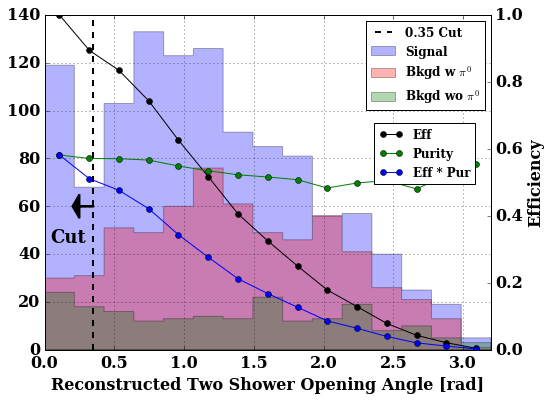

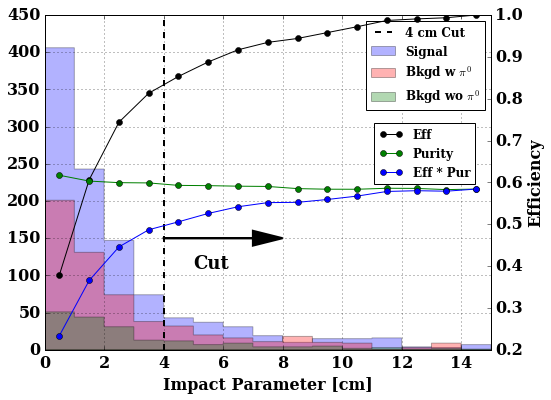

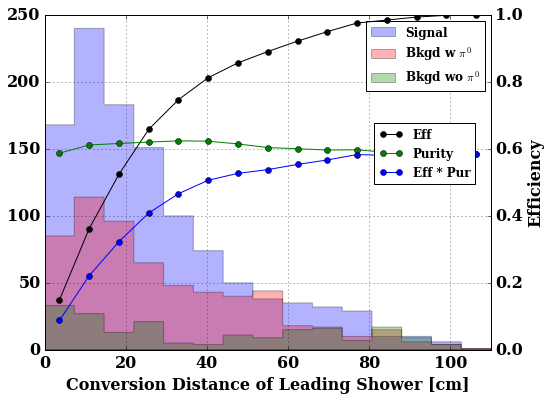

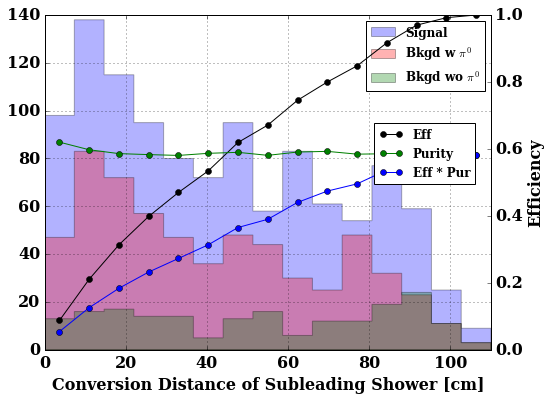

In [19]:
makeEffPlots('_gamma_oangle',0,3.2,xlabel='Reconstructed Two Shower Opening Angle [rad]',cut=0.35,cutlabel='0.35 Cut',\
            a_v=[0.35,-0.1,60,0,10,0.05],t_v=[0.04,45])
makeEffPlots('_gamma_IP',0,15,xlabel='Impact Parameter [cm]',cut=4,cutlabel='4 cm Cut',fwrd=False,\
            a_v=[4,3,150,0,20,1],t_v=[5,110])
makeEffPlots('_gamma_high_RL',0,110,xlabel='Conversion Distance of Leading Shower [cm]',fwrd=False)
makeEffPlots('_gamma_low_RL',0,110,xlabel='Conversion Distance of Subleading Shower [cm]',fwrd=False)


In [6]:
# Compare 1 shrs cut
stage = 'pi0'
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/cutjustify_%s_v4.root'%stage,\
                  treename='one_gamma_tree')
df = pd.DataFrame(f)

#dfsig = df.query('_nu_pdg == 14 and _isCC == 1 and _n_nu_origin_pi0 > 0')
#dfbkgd_pi0 = df.query('(_isCC == 0 and _found_pi0 == 1) or (_isCC == 1 and _found_pi0 == 1 and _n_nu_origin_pi0 == 0)')
#dfbkgd = df.query('_found_pi0 == 0')

dfsig = df.query('_nu_pdg == 14 and _isCC == 1 and _n_nu_origin_pi0 == 1')
dfbkgd_pi0 = df.query('(_isCC == 0 and _found_pi0 == 1) or (_isCC == 1 and _found_pi0 == 1 and _n_nu_origin_pi0 == 0) or\
(_isCC == 1 and _n_nu_origin_pi0 > 1)')
dfbkgd = df.query('_found_pi0 == 0')

df_v = [dfsig, dfbkgd_pi0, dfbkgd]
dflabel_v = ['CC1pi0','Background w pi0','Background wo pi0']
#print df.shape[0], dfsig.shape[0], dfbkgd_pi0.shape[0],dfbkgd.shape[0]

stage = 'pi0v2'


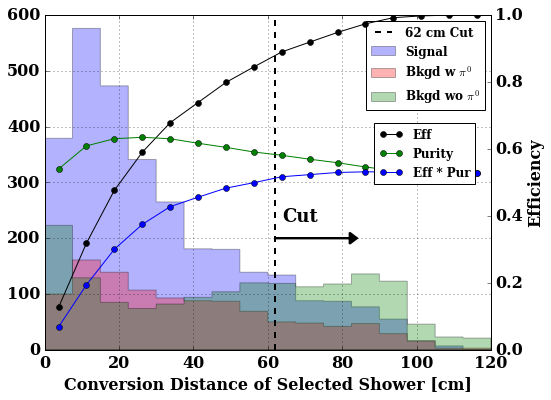

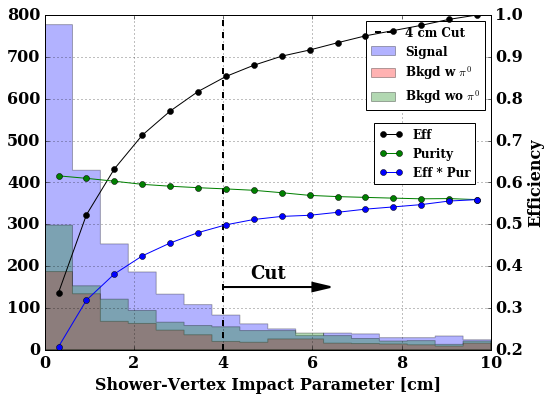

In [21]:
stage = 'pi0_1shower'

makeEffPlots('_gamma_RL',0,120,nbins=16,xlabel='Conversion Distance of Selected Shower [cm]',cut=62,cutlabel='62 cm Cut',fwrd=False,\
            a_v=[62,20,200,0,20,2],t_v=[64,230])
makeEffPlots('_gamma_vtx_IP',0,10,nbins=16,xlabel='Shower-Vertex Impact Parameter [cm]',cut=4,cutlabel='4 cm Cut',fwrd=False,\
            a_v=[4,2,150,0,20,0.4],t_v=[4.6,170])
#makeEffPlots('_gamma_E',0,300,nbins=16,xlabel='Energy [MeV]')


## Now going to look into background plots before cuts

In [7]:
stage = 'showerPostSel2'

#f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/cutjustify_pi0.root', treename='gamma_tree')
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/cutjustify_pi0_w_origin.root', treename='gamma_tree')
df = pd.DataFrame(f)

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/cutjustify_pi0.root', treename='gamma_tree')
df0 = pd.DataFrame(f)
#stage = 'onbeam_pi0'

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/cutjustify_pi0.root', treename='gamma_tree')
df1 = pd.DataFrame(f)
#stage = 'offbeam_pi0'

print df0.shape, df1.shape, df.shape
#print df.info()

(259, 12) (1, 12) (1952, 57)


In [8]:
#print df.info()

In [9]:
# oth_v = df.query('bkgd_id == 0') #noise
# cos_v = df.query('bkgd_id == 1')
# cc1pi0_v = df.query('bkgd_id == 2')
# nc1pi0_v = df.query('bkgd_id == 3')
# cc1pi0_outFV_v = df.query('bkgd_id == 4')
# multpi0_v = df.query('bkgd_id == 5')
# nue_v = df.query('bkgd_id == 6')
# antinumu_v = df.query('bkgd_id == 7')
# cccex_v = df.query('bkgd_id == 8 ')
# nccex_v = df.query('bkgd_id == 9')
# ccgamma_v = df.query('bkgd_id == 10')
# kaon_v = df.query('bkgd_id == 11')
# ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
# ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

dfa = df.query('_pi0_origin == 1')

cos_v = df.query('bkgd_id == 1 or _pi0_origin != 1')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                  bkgd_id ==12 or bkgd_id ==13) & _pi0_type == 1 )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & _pi0_type != 1)')

print cos_v.shape[0] + cc1pi0_v.shape[0] + nc1pi0_v.shape[0] + multpi0_v.shape[0] + \
          cccex_v.shape[0] + nu_EM_v.shape[0] + oth_v.shape[0]  #+ no_EM_v.shape[0]

1952


In [10]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'bkgd_id'

sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nuEM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

df_v = [df1, cos_v, oth_v,nc1pi0_v, multpi0_v, cccex_v, nu_EM_v,cc1pi0_v]
weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nuEM_w,sig_w]

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449


In [14]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',cut='',a_v=[],t_v=[]):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)*off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
   
    lgd = 0
    
    labels_tst = ['Cosmics','Cosmic+Neutrino','Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','Final State EM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    counts, edges,_ = ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')

    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='Data',markersize=6,lw=1.5)
    if cut != '' :
        plt.axvline(float(cut.split(' ')[0]),label='%s Cut'%cut,lw=3,ls='--',color='r')
    handles,labels = ax.get_legend_handles_labels()
    if len(a_v) != 0:
        ax0 = a_v[0]; ax1 = a_v[1]; ay0 = a_v[2]; ay1 = a_v[3];
        tx = t_v[0]; ty = t_v[1]
        ax.arrow(ax0, ay0, ax1, ay1, head_width=a_v[4], head_length=a_v[5], fc='k',ec='k',lw=2)
        plt.text(tx, ty, 'Cut',fontsize=18,weight='bold',color='k')
    
    if  var == 'gamma_E' or var == '_gamma_oangle' or var == '_gamma_RL' or var =='_gamma_low_RL' or\
        var == '_gamma_high_RL':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
    #plt.legend()
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

In [15]:
#print df.info()

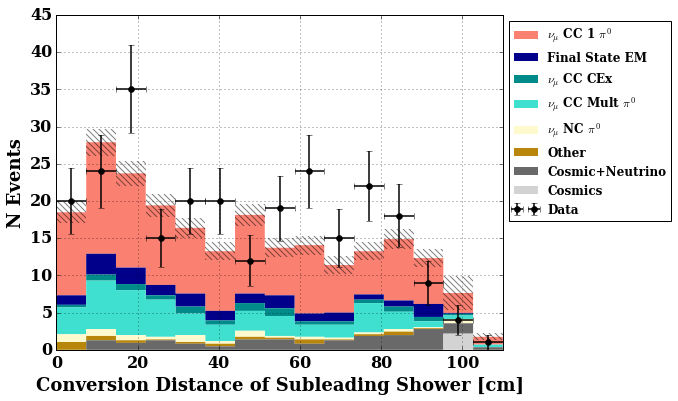

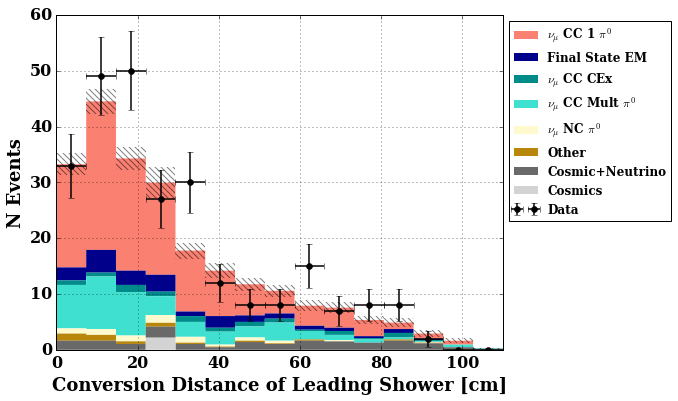

In [16]:

makeOnOffPlots('_gamma_low_RL',0,110,nbins=15,xlabel='Conversion Distance of Subleading Shower [cm]')
makeOnOffPlots('_gamma_high_RL',0,110,nbins=15,xlabel='Conversion Distance of Leading Shower [cm]')

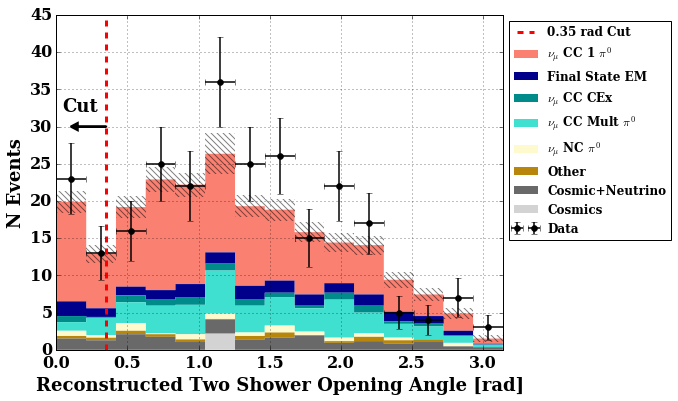

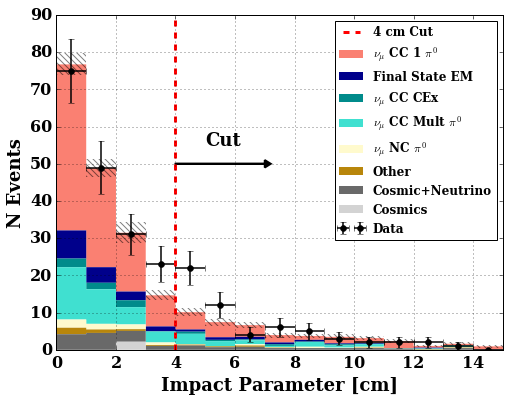

In [18]:
makeOnOffPlots('_gamma_oangle',0,3.14159,nbins=15,xlabel='Reconstructed Two Shower Opening Angle [rad]',cut='0.35 rad',\
            a_v=[0.35,-0.2,30,0,1,0.05],t_v=[0.04,32])
makeOnOffPlots('_gamma_IP',0,15,nbins=15,xlabel='Impact Parameter [cm]',cut='4 cm',\
               a_v=[4,3,50,0,2,0.2],t_v=[5,55])


In [20]:
def makeMCPlots(var,xmin,xmax,nbins=20,xlabel='',cut=''):
    
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    labels_tst = ['Cosmic - $\\nu$ Coincident','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','N-$\gamma$','Signal']

    colors_tst = ['dimgrey','darkgoldenrod','yellow','mediumpurple','purple','lime','darkgreen','lightskyblue','blue',\
                 'darkblue','salmon'] 

    oth_v = df.query('bkgd_id == 0') #noise
    cos_v = df.query('bkgd_id == 1')
    cc1pi0_v = df.query('bkgd_id == 2')
    nc1pi0_v = df.query('bkgd_id == 3')
    cc1pi0_outFV_v = df.query('bkgd_id == 4')
    multpi0_v = df.query('bkgd_id == 5')
    nue_v = df.query('bkgd_id == 6')
    antinumu_v = df.query('bkgd_id == 7')
    cccex_v = df.query('bkgd_id == 8 ')
    nccex_v = df.query('bkgd_id == 9')
    ccgamma_v = df.query('bkgd_id == 10')
    kaon_v = df.query('bkgd_id == 11')
    ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
    ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')
    
    type0 = df.query('bkgd_id == 2 or bkgd_id ==4')
    type1 = df.query('bkgd_id == 3 or bkgd_id == 5 or  bkgd_id == 8 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11')
    type2 = df.query('bkgd_id == 0 or bkgd_id == 1 or bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 13')
      
    fig,ax = plt.subplots(figsize=(8,6))
    
    plt.hist(type0[var].values,bins=nbins,label='Signal',color='blue',alpha=0.3,histtype='stepfilled',range=(xmin,xmax))
    plt.hist(type1[var].values,bins=nbins,label='Bkgd w $\pi^0$',color='red',alpha=0.3,histtype='stepfilled',range=(xmin,xmax))
    plt.hist(type2[var].values,bins=nbins,label='Bkgd wo $\pi^0$',color='green',alpha=0.3,histtype='stepfilled',range=(xmin,xmax))

    if cut != '' :
        plt.axvline(float(cut.split(' ')[0]),label='%s Cut'%cut,lw=3,ls='--',color='r')
    lgd = 0
    handles,labels = ax.get_legend_handles_labels()

    if  var == 'gamma_E' or var == '_gamma_oangle' or var == '_gamma_RL' or var =='_gamma_low_RL' or\
        var == '_gamma_high_RL':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    #plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

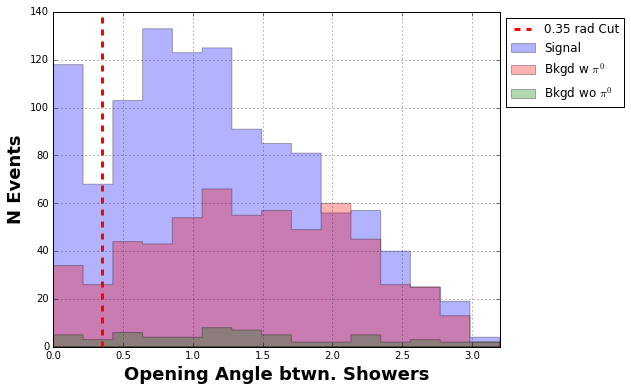

In [35]:
makeMCPlots('_gamma_oangle',0,3.2,nbins=15,xlabel='Opening Angle btwn. Showers',cut='0.35 rad')


In [14]:
stage = 'showerPostSel2'

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/cutjustify_pi0_w_origin_v2.root', treename='one_gamma_tree')
df = pd.DataFrame(f)

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/cutjustify_pi0.root', treename='one_gamma_tree')
df0 = pd.DataFrame(f)
#stage = 'onbeam_pi0'

f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/cutjustify_pi0.root', treename='one_gamma_tree')
df1 = pd.DataFrame(f)
#stage = 'offbeam_pi0'

print df0.shape, df1.shape, df.shape


(709, 4) (25, 4) (5757, 22)


In [15]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757 entries, 0 to 5756
Data columns (total 22 columns):
bkgd_id             5757 non-null int32
_event              5757 non-null int32
_gamma_E            5757 non-null float32
_gamma_RL           5757 non-null float32
_gamma_vtx_IP       5757 non-null float32
_gamma_matched      5757 non-null int8
_event_type         5757 non-null int32
_nu_pdg             5757 non-null int32
_isCC               5757 non-null int8
_found_pi0          5757 non-null int8
_n_nu_origin_pi0    5757 non-null int32
_gamma_purity       5757 non-null float32
_gamma_complete     5757 non-null float32
_mc_dirx            5757 non-null float32
_mc_diry            5757 non-null float32
_mc_dirz            5757 non-null float32
_gamma_dirx         5757 non-null float32
_gamma_diry         5757 non-null float32
_gamma_dirz         5757 non-null float32
_res                5754 non-null float32
_gamma_origin       5757 non-null int32
_gamma_type         5757 non-nul

In [17]:
dfa = df.query('_gamma_origin == 1')

cos_v = df.query('bkgd_id == 1 or _gamma_origin != 1')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                  bkgd_id ==12 or bkgd_id ==13) & _gamma_type == 1 )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                    ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                  bkgd_id ==12 or bkgd_id ==13) & _gamma_type != 1)')

dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'bkgd_id'

sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nuEM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

df_v = [df1, cos_v, oth_v,nc1pi0_v, multpi0_v, cccex_v, nu_EM_v,cc1pi0_v]
weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nuEM_w,sig_w]

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449


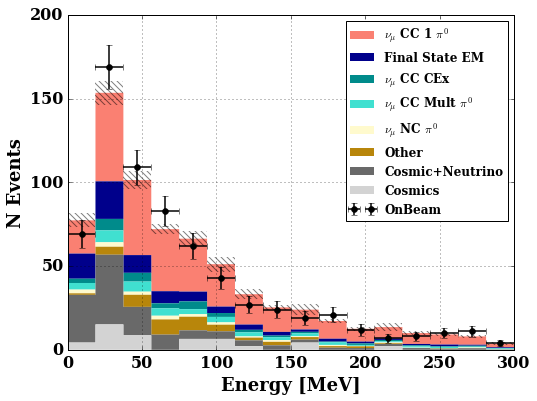

In [20]:
makeOnOffPlots('_gamma_E',0,300,nbins=16,xlabel='Energy [MeV]')


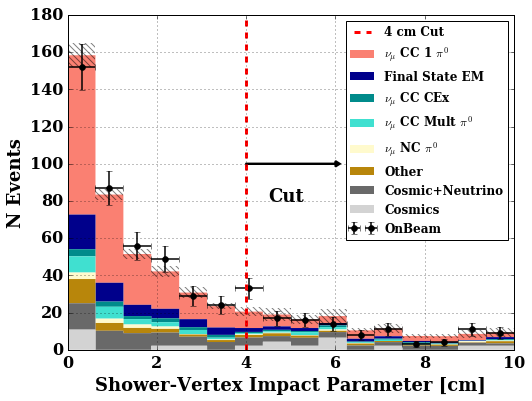

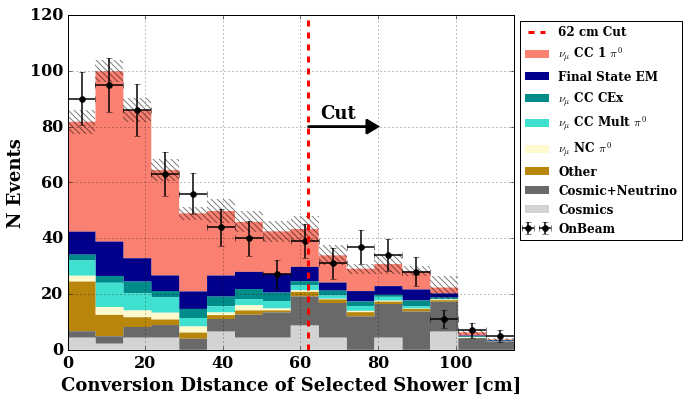

In [21]:
makeOnOffPlots('_gamma_vtx_IP',0,10,nbins=16,xlabel='Shower-Vertex Impact Parameter [cm]',cut='4 cm',\
              a_v=[4,2,100,0,3,0.1],t_v=[4.5,80])
makeOnOffPlots('_gamma_RL',0,115,nbins=16,xlabel='Conversion Distance of Selected Shower [cm]',cut='62 cm',\
              a_v=[62,15,80,0,5,3],t_v=[65,83])
